In [18]:
import pandas as pd
import numpy as np

df = pd.read_excel("./20210620_tx2rx_screening.xlsx", "status")
df.columns

Index(['curr_time', 'opts', 'yaml', 'datarate', 'refclk', 'multi_lane_on',
       'trial', 'chipid', 'lane', 'Vt_Ospts',
       ...
       'hbridge_lsb_ovr_nt', 'hbridge_bias_adj', 'hbridge_msb',
       'loopback_cntrl-ena_nt', 'loopback_cntrl-tx_nes_loopback_ena_nt',
       'loopback_cntrl-rx_nes_loopback_ena_nt',
       'loopback_cntrl-tx_fes_loopback_ena_nt',
       'loopback_cntrl-rx_fes_loopback_ena_nt',
       'loopback_cntrl-tx_bitck_loopback_ena_nt',
       'loopback_cntrl-rx_bitck_loopback_ena_nt'],
      dtype='object', length=107)

In [26]:
bist_index = list(df.columns).index("rxbist_ber")
bist_index

df_splits = df[list(df.columns)[bist_index:-1]]


C:\Users\paulk\AppData\Local\Temp/ipykernel_32988/1992988144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_splits["rxbist_ber"] = df_splits["rxbist_ber"] <= 1E-4


In [30]:
#set the label
df['label'] = df['rxbist_ber'] <= 1e-4


,rxbist_ber,cm3,cm2,cm1,c1,c0,tx_dcd_d0,tx_dcd_d90,tx_iq,rx_dcd_d0,...,hbridge_lsb_ovr_nt,hbridge_bias_adj,hbridge_msb,loopback_cntrl-ena_nt,loopback_cntrl-tx_nes_loopback_ena_nt,loopback_cntrl-rx_nes_loopback_ena_nt,loopback_cntrl-tx_fes_loopback_ena_nt,loopback_cntrl-rx_fes_loopback_ena_nt,loopback_cntrl-tx_bitck_loopback_ena_nt,label
20,3.200030,0,0,10,9,63,105,98,45,26,...,32,1,27,0,0,0,0,0,0,False
21,3.200004,0,0,10,9,63,105,102,45,28,...,32,1,27,0,0,0,0,0,0,False
22,3.200042,0,0,10,9,63,106,98,45,28,...,32,1,27,0,0,0,0,0,0,False
23,3.200022,0,0,10,9,63,106,98,43,28,...,32,1,27,0,0,0,0,0,0,False
24,3.199975,0,0,10,9,63,106,97,45,28,...,32,1,27,0,0,0,0,0,0,False
100,3.200011,0,0,10,9,63,69,34,52,91,...,32,1,27,0,0,0,0,0,0,False
101,3.200040,0,0,10,9,63,70,33,52,89,...,32,1,27,0,0,0,0,0,0,False
102,3.200041,0,0,10,9,63,70,33,52,91,...,32,1,27,0,0,0,0,0,0,False
103,3.199970,0,0,10,9,63,67,33,52,89,...,32,1,27,0,0,0,0,0,0,False
104,3.200003,0,0,10,9,63,70,35,52,91,...,32,1,27,0,0,0,0,0,0,False


In [ ]:
#now lets run a simple correlation with status values
df_correlation = df.drop(columns=["label"])
df_correlation.std() > 0.3
v = df_correlation.std() > 0.3
df_correlation = df_correlation.loc[:, v.reindex(df_correlation.columns, axis=1, fill_value=False)]

corrs = df_correlation.corr()

#we just want to get an array of what is highly correlated with rxbist for now
#so take the first column

bist_corrs = np.abs(corrs["rxbist_ber"])
bist_corrs.sort_values(ascending=False)

In [99]:
df_fail = df[list(bist_corrs.index)[0:10]]
df_fail = df[df["label"] == False]

df_pass = df[list(bist_corrs.index)[0:10]]
df_pass = df[df["label"] == True]

x_pass, y_pass = df_pass["ctle_boost1"], df_pass["vga_offset_a"]
x_fail, y_fail = df_fail["ctle_boost1"], df_fail["vga_offset_a"]

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_pairplot = df[list(bist_corrs.index)[0:25]]
df_pairplot['label'] = df['label']

print(df_pairplot)

"""sns.set_theme(style="ticks")
sns.pairplot(df_pairplot, hue="label")
plt.show()"""

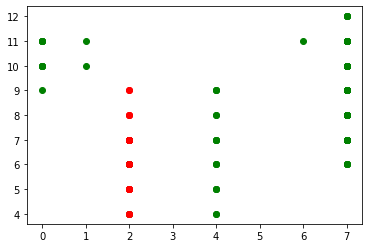

In [100]:
plt.scatter(x_pass, y_pass, c="green")
plt.scatter(x_fail, y_fail, c="red")

{'whiskers': [<matplotlib.lines.Line2D at 0x17be1c38fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x17be1c47700>,
 'boxes': [<matplotlib.lines.Line2D at 0x17be1c38c10>],
 'medians': [<matplotlib.lines.Line2D at 0x17be1c47e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x17be1c521f0>],
 'means': []}

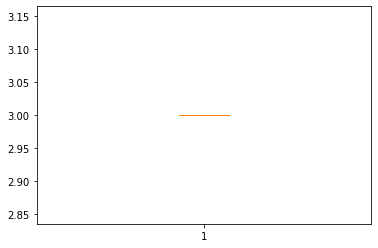

In [95]:
plt.boxplot(y_fail)

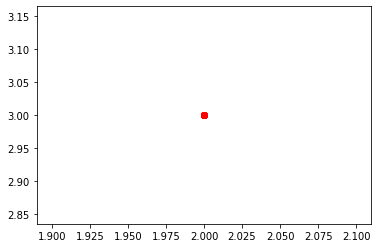

In [96]:
plt.scatter(x_fail, y_fail, c="red")

In [121]:
df_pmon = pd.read_excel("./20210620_tx2rx_screening.xlsx", "pmon")


In [122]:
df_pmon['label'] = df_pmon["rxbist_ber"] <= 1e-4
df_pmon

,rxbist_ber,pmon_ulvt,pmon_lvt,pmon_svt,pmon_hv,pmon_tgate,pmon_momcap,pmon_nand,pmon_nor,label
0,0.000016,349.73,397.95,339.36,478.52,267.94,268.55,389.40,390.01,True
1,0.000019,349.73,397.95,338.75,480.35,267.94,269.17,389.40,390.62,True
2,0.000016,349.73,397.95,338.13,480.35,267.94,269.17,390.01,390.01,True
3,0.000016,349.73,397.95,338.13,479.13,267.94,269.17,390.01,390.01,True
4,0.000017,349.12,397.95,337.52,479.13,267.94,269.17,390.01,390.01,True
...,...,...,...,...,...,...,...,...,...,...
235,0.000015,344.85,360.72,333.25,427.25,242.31,263.67,374.15,377.20,True
236,0.000043,345.46,360.72,333.86,427.25,241.70,263.67,374.76,377.20,True
237,0.000025,344.85,360.72,333.86,427.25,242.31,263.67,374.76,377.20,True
238,0.000029,344.85,360.11,333.86,427.25,242.31,263.67,374.76,377.20,True


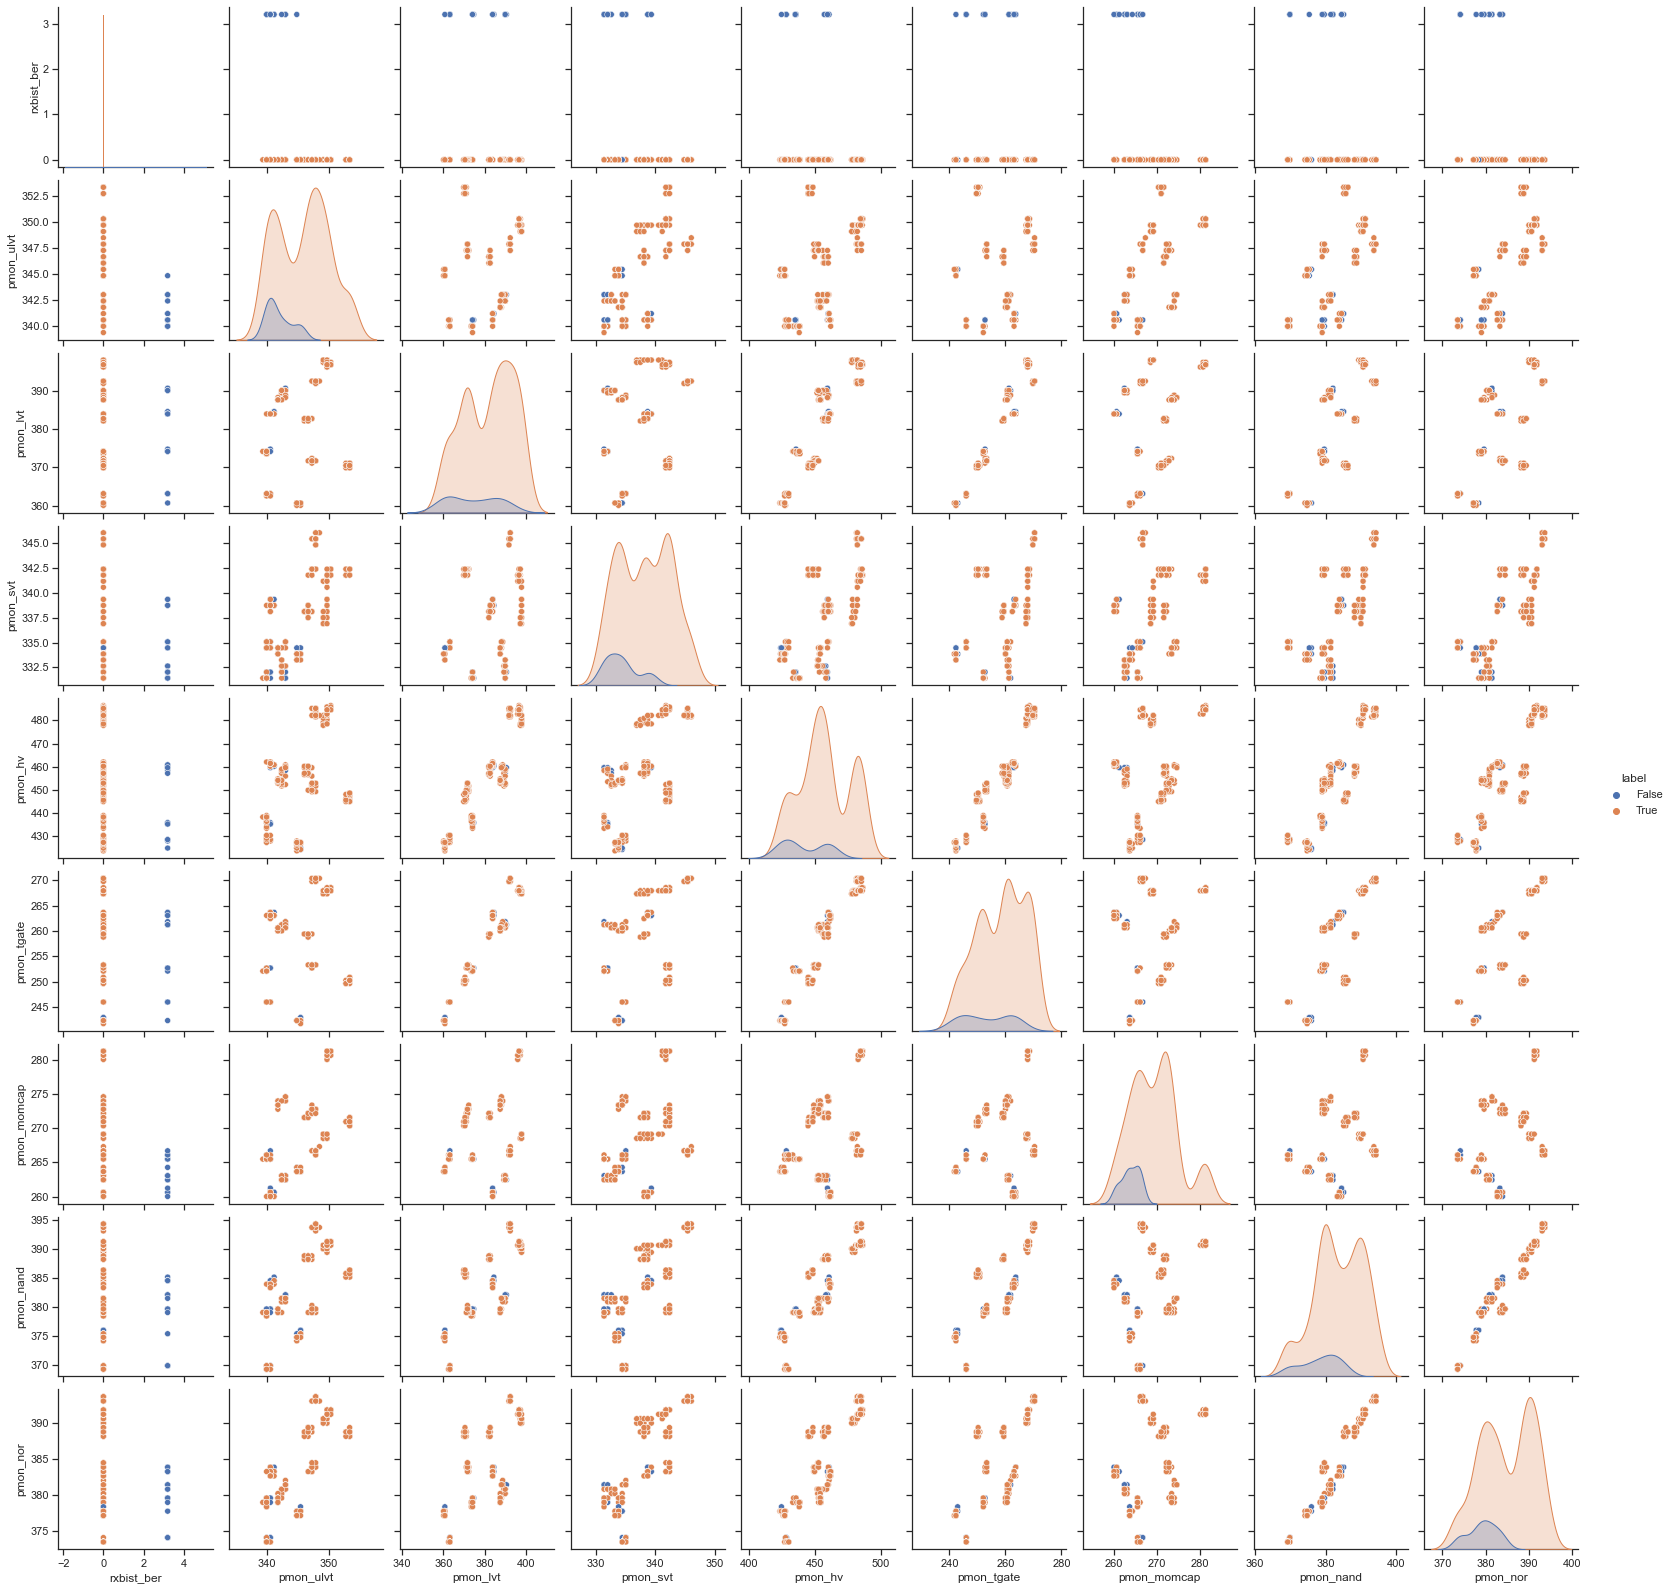

In [124]:
sns.pairplot(df_pmon, hue='label')
plt.show()

In [ ]:
##lets do a basic decision tree classifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#contains all the status values
df_pairplot.head()

In [131]:
from sklearn.model_selection import train_test_split
X = df_pairplot.drop(columns=["label"])
Y = df_pairplot['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#we are using 20 features. I dont think dataset is large enough tbh
X_train.shape, X_test.shape

((168, 20), (72, 20))

In [134]:
#we would need to encode categorical data if we had any but we do not
#this can be done with:
'''
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

'''

#sacle the features
scaler = RobustScaler()
cols = X_train.columns
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test = pd.DataFrame(X_train, columns=[cols]), pd.DataFrame(X_test, columns=[cols])



In [157]:
vals = abs(df_pairplot.corr()['label'])
vals.sort_values(ascending=False)

label              1.000000
ctle_boost1        0.512899
ctle_boost_a       0.449923
vga_offset_a       0.435581
ctle_boost2        0.429863
vga1               0.295361
vga_coarse_a       0.289607
vga2               0.281684
tx_osc_int_max     0.269112
tx_osc_int_avg     0.262140
tx_osc_int_min     0.260362
rx_dcd_d0          0.232390
rx_dcd_d90         0.157420
tx_osc             0.126672
cmn_osc_int_avg    0.113425
cmn_osc_accum      0.109099
rx_osc             0.059945
rx_iq              0.044905
cmn_osc            0.036282
tx_iq              0.013769
rx_osc_int_avg     0.000231
Name: label, dtype: float64

In [138]:
#now  build the model
rfc = RandomForestClassifier(random_state=0)
#fit the model
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
acc = accuracy_score(Y_test, y_pred)

print("The overall prediction accuracy with 10 decision trees: {}".format(acc*100))

The overall prediction accuracy with 10 decision trees: 100.0


[0.1436491841976813, 0.11312019883369352, 0.10821395489469321, 0.08248822474591908, 0.07126660189722057, 0.061909198261983774, 0.059250438704935286, 0.04527893643676831, 0.045219820703953355, 0.03719821195357078, 0.03687422933775644, 0.032225169086446036, 0.030515718866373512, 0.029474863081864755, 0.023791847961443565, 0.023048187082330522, 0.018098330495432656, 0.017852092487822765, 0.011544995781441357, 0.00897979518866927]


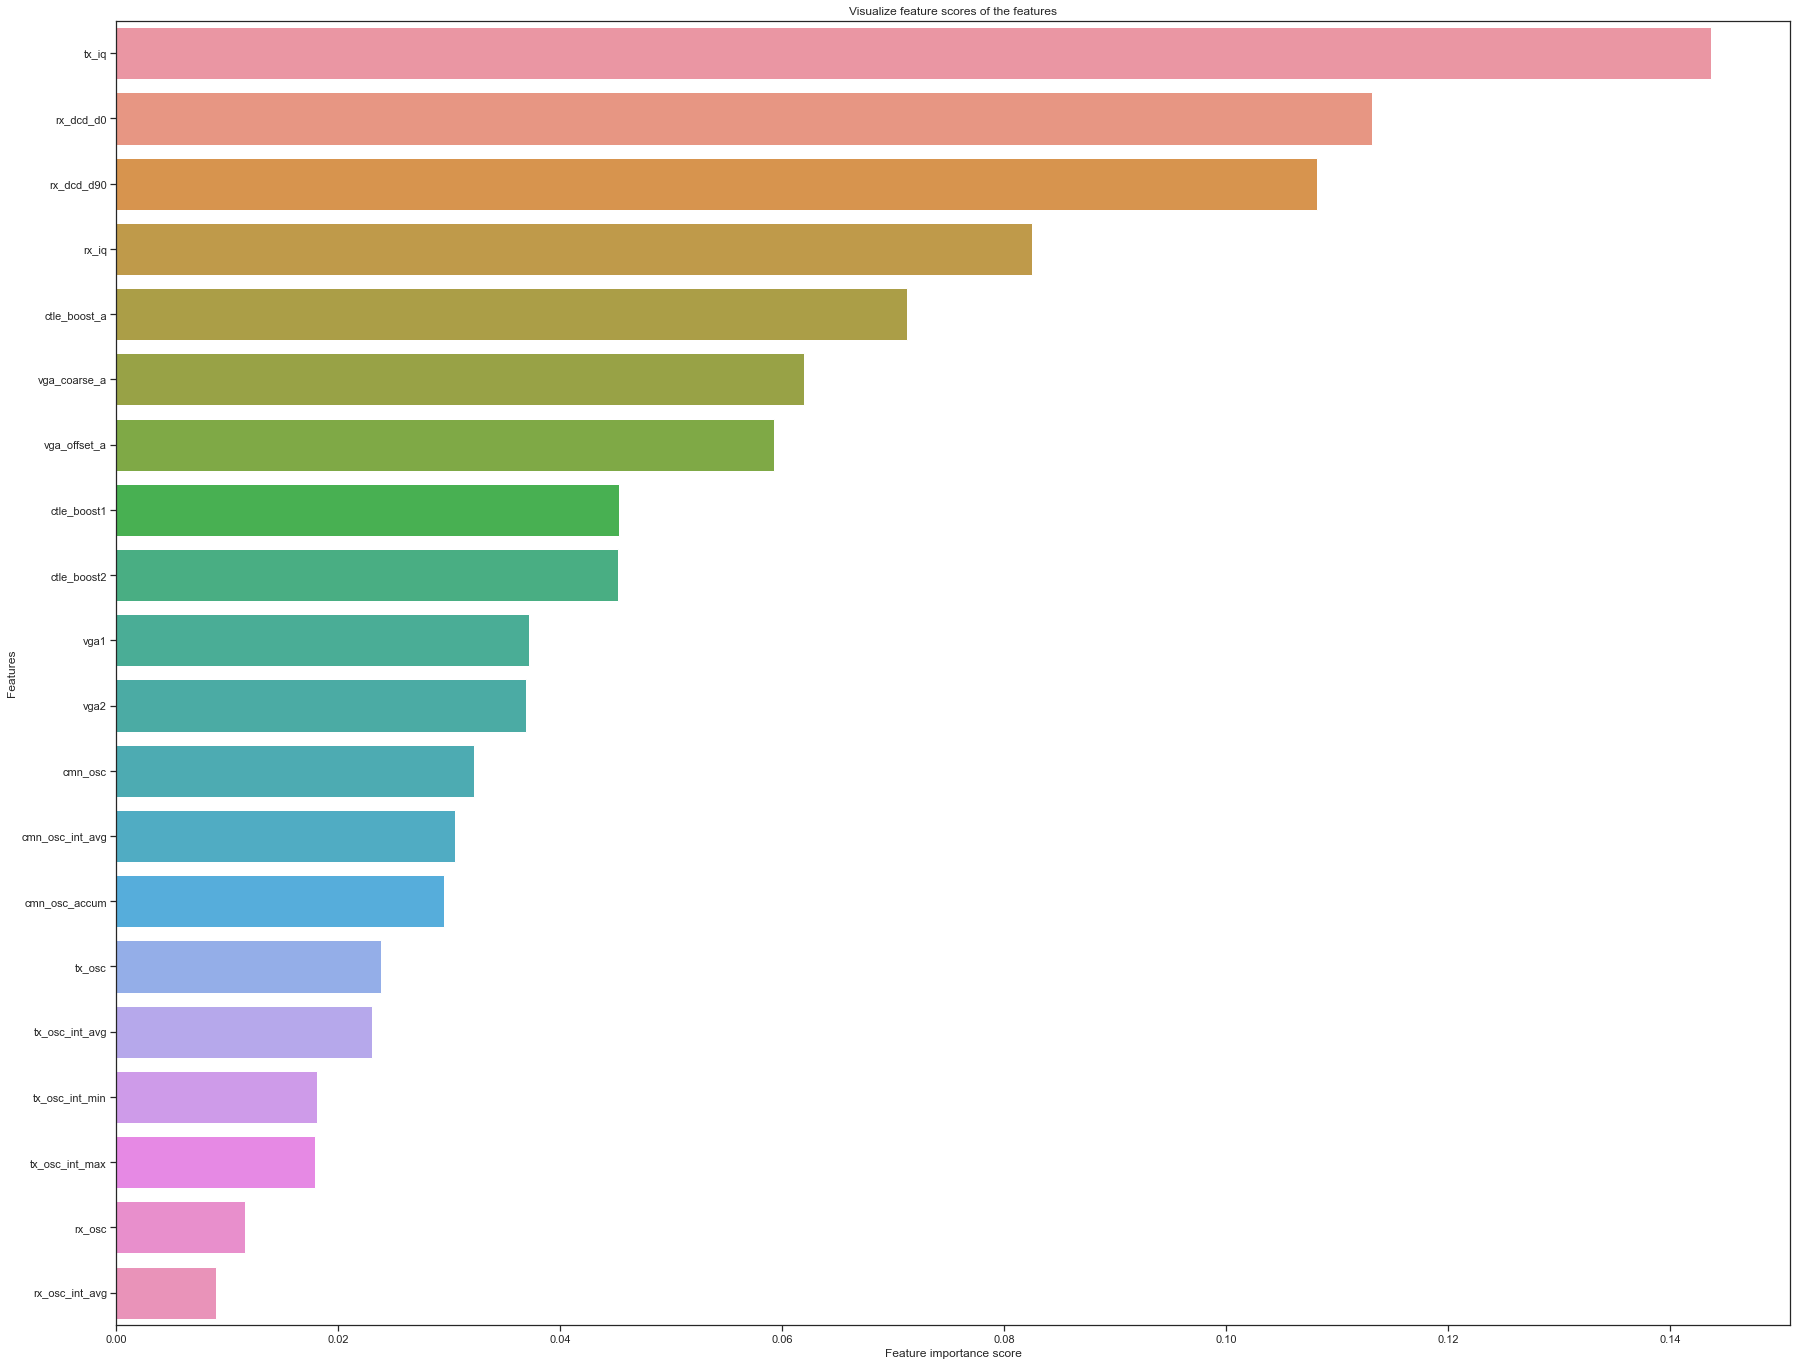

In [155]:
#now determining the feature importance
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train)

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(list(feature_scores))

f, ax = plt.subplots(figsize=(30, 24))
fig_df = pd.DataFrame(dict(scores=list(feature_scores), labels=
                          list(cols)))
ax = sns.barplot(data=fig_df, x='scores', y='labels')
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(list(cols))
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [179]:
import pandas as pd
import numpy as np

df = pd.read_excel("./20210620_tx2rx_screening.xlsx", "pmon")
df.corr()

def convert_lower_diag(corr):
    '''conver a pandas correlation df to np matrix'''
    v = list(corr.values)
    r,c = len(v), len(v[0])
    mat = np.zeros((r,c))
    for i in range(r):
        for j in range(c):
            mat[i,j] = corr.values[i,j]
            if(i<=j):
                break
    return mat

def correlation_distance(mat):
    '''takes a lower diagonal correlation matrix and finds the min distance'''
    #method calculates distance as 1-corr(i,j) for each entrity
    dist_mat = np.zeros((mat.shape[0], mat.shape[1]))
    current_min, r_min, c_min = 1, 0, 0
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            #need to hard code for now since it is a diag and will grab 
            #0s with a min method
            if(i<j):
                break
            dist_mat[i,j] = 1-abs(mat[i,j])
            
            if(1-abs(mat[i,j]) < current_min and i!=j):
                current_min = 1-abs(mat[i,j])
                r_min, c_min = i, j
    return (dist_mat, current_min, r_min, c_min)
            


m = convert_lower_diag(df.corr())
print(df.corr())
mat, min_, rm, cm = correlation_distance(m)


                

             rxbist_ber  pmon_ulvt  pmon_lvt  pmon_svt   pmon_hv  pmon_tgate  \
rxbist_ber     1.000000  -0.306848 -0.096968 -0.242368 -0.176517   -0.095134   
pmon_ulvt     -0.306848   1.000000  0.241756  0.723107  0.473587    0.243395   
pmon_lvt      -0.096968   0.241756  1.000000  0.289584  0.921439    0.969577   
pmon_svt      -0.242368   0.723107  0.289584  1.000000  0.614198    0.442184   
pmon_hv       -0.176517   0.473587  0.921439  0.614198  1.000000    0.959171   
pmon_tgate    -0.095134   0.243395  0.969577  0.442184  0.959171    1.000000   
pmon_momcap   -0.275544   0.565856  0.307715  0.421089  0.407672    0.260955   
pmon_nand     -0.194803   0.636890  0.785357  0.664008  0.898005    0.832897   
pmon_nor      -0.246023   0.785008  0.668527  0.788738  0.852935    0.728196   

             pmon_momcap  pmon_nand  pmon_nor  
rxbist_ber     -0.275544  -0.194803 -0.246023  
pmon_ulvt       0.565856   0.636890  0.785008  
pmon_lvt        0.307715   0.785357  0.668527  
pmon_sv

In [252]:
#lets implement the process recursively
#recall when collapsing, take the min distance the merged group has with the
#other groups
new_row = np.array([])
#now for each column find the min measurement with each other feature
for i in range(mat.shape[1]):
    if(i==2 or i ==5):
        continue
    new_row = np.concatenate((new_row, [min(mat[max(5, i), min(5, i)], 
                                            mat[max(2, i), min(2, i)])]))

new_row = np.concatenate((new_row, [0]), axis=None)
#once we have the new row, remove the columns and then rows
#delete rows
mat2 = np.delete(mat, 2,1)
mat2 = np.delete(mat2, 5,1)
mat2 = np.delete(mat2, 2,0)
mat2 = np.delete(mat2, 5,0)

#now go through rows
new_mat = np.zeros((mat.shape[0]-1, mat.shape[1]-1))
new_mat[1:, 1:] = mat2
new_mat[1:, 0] = new_row[:-1]
print(pd.DataFrame(new_mat))
"""for i in range(new_mat.shape[0]-1):
    
    new_mat[i+1, 0] = new_row[i]
    new_mat[i+1, 1:] = mat2[i-1, :]
    
print(pd.DataFrame(new_mat))"""
            
"""mat2 = np.delete(mat, 2, 0)
mat2 = np.delete(mat2, 2, 1)
print(mat2.shape, len(new_row))
mat2 = np.concatenate((mat2, new_row), axis=1)
print(mat2)"""


          0         1         2         3         4         5         6    7
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
1  0.903032  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
2  0.756605  0.693152  0.000000  0.000000  0.000000  0.000000  0.000000  0.0
3  0.557816  0.757632  0.276893  0.000000  0.000000  0.000000  0.000000  0.0
4  0.040829  0.823483  0.526413  0.385802  0.000000  0.000000  0.000000  0.0
5  0.692285  0.904866  0.756605  0.557816  0.040829  0.000000  0.000000  0.0
6  0.167103  0.805197  0.363110  0.335992  0.101995  0.167103  0.000000  0.0
7  0.271804  0.753977  0.214992  0.211262  0.147065  0.271804  0.033984  0.0


'mat2 = np.delete(mat, 2, 0)\nmat2 = np.delete(mat2, 2, 1)\nprint(mat2.shape, len(new_row))\nmat2 = np.concatenate((mat2, new_row), axis=1)\nprint(mat2)'